In [51]:
from sklearn.externals import joblib

finalMergedDF = joblib.load('finalMergedDF.pkl') 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from pandas import DataFrame
from pandas import concat

from keras.models import Sequential
from keras.layers import LSTM 
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

del finalMergedDF['time']
del finalMergedDF['rolling_mean_mood']
del finalMergedDF['mood']

cols = list(finalMergedDF)
cols.insert(0, cols.pop(cols.index('mood_mean_difference')))
finalMergedDF = finalMergedDF.ix[:,cols]

values = finalMergedDF.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, 1,1)
reframed.drop(reframed.columns[[33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]], axis=1, inplace=True)
reframed

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var24(t-1),var25(t-1),var26(t-1),var27(t-1),var28(t-1),var29(t-1),var30(t-1),var31(t-1),var32(t-1),var1(t)
1,0.457547,0.875,0.0,0.000000,0.6,1.0,1.0,1.000000,0.984299,0.002443,...,0.012093,0.042949,0.000000,0.446429,0.25,0.092233,0.057971,0.000000,0.5170,0.561321
2,0.561321,0.500,0.0,0.000000,0.7,1.0,1.0,0.000000,0.984299,0.002443,...,0.012093,0.042949,0.000000,0.446429,0.25,0.092233,0.057971,0.000000,0.5170,0.665094
3,0.665094,0.500,0.7,0.000000,0.5,1.0,1.0,0.652174,0.987010,0.057316,...,0.024065,0.094235,0.093417,0.428571,0.25,0.300971,0.101449,0.000000,0.2013,0.660377
4,0.660377,0.500,0.4,0.333333,0.3,0.0,1.0,0.695652,0.987010,0.057316,...,0.024065,0.094235,0.093417,0.428571,0.25,0.300971,0.101449,0.000000,0.2013,0.528302
5,0.528302,0.625,0.2,0.111111,0.2,0.0,1.0,0.826087,0.887669,0.223754,...,0.024284,0.235885,0.000833,0.428571,0.25,0.019417,0.000000,0.000000,0.3425,0.518868
6,0.518868,0.750,0.0,0.000000,0.3,0.0,1.0,0.869565,0.993285,0.008672,...,0.024284,0.235885,0.000833,0.392857,0.25,0.000000,0.000000,0.000000,0.3350,0.518868
7,0.518868,0.625,0.0,0.000000,0.3,1.0,1.0,0.913043,0.968664,0.001490,...,0.014318,0.193603,0.000000,0.392857,0.25,0.077670,0.057971,0.000000,0.2286,0.636793
8,0.636793,0.500,0.0,0.000000,0.4,1.0,1.0,0.956522,0.988334,0.010845,...,0.014318,0.193603,0.000000,0.392857,0.25,0.000000,0.000000,0.000000,0.4277,0.523585
9,0.523585,0.750,0.0,0.000000,0.5,0.0,1.0,1.000000,0.988334,0.010845,...,0.014318,0.193603,0.000000,0.392857,0.25,0.000000,0.000000,0.000000,0.4277,0.518868
10,0.518868,0.750,0.0,0.222222,0.4,0.0,1.0,0.478261,0.984607,0.000000,...,0.035410,0.133369,0.001583,0.410714,0.25,0.048544,0.043478,0.000000,0.2083,0.396226


In [53]:
values = reframed.values
n_train_hours = 450
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(450, 1, 32) (450,) (163, 1, 32) (163,)


Train on 450 samples, validate on 163 samples
Epoch 1/130
 - 2s - loss: 0.3833 - val_loss: 0.1464
Epoch 2/130
 - 0s - loss: 0.1385 - val_loss: 0.1773
Epoch 3/130
 - 0s - loss: 0.1505 - val_loss: 0.1098
Epoch 4/130
 - 0s - loss: 0.1169 - val_loss: 0.1165
Epoch 5/130
 - 0s - loss: 0.1161 - val_loss: 0.1018
Epoch 6/130
 - 0s - loss: 0.1112 - val_loss: 0.1060
Epoch 7/130
 - 0s - loss: 0.1086 - val_loss: 0.0996
Epoch 8/130
 - 0s - loss: 0.1062 - val_loss: 0.0988
Epoch 9/130
 - 0s - loss: 0.1054 - val_loss: 0.0993
Epoch 10/130
 - 0s - loss: 0.1046 - val_loss: 0.0982
Epoch 11/130
 - 0s - loss: 0.1037 - val_loss: 0.0982
Epoch 12/130
 - 0s - loss: 0.1034 - val_loss: 0.0982
Epoch 13/130
 - 0s - loss: 0.1029 - val_loss: 0.0981
Epoch 14/130
 - 0s - loss: 0.1025 - val_loss: 0.0980
Epoch 15/130
 - 0s - loss: 0.1021 - val_loss: 0.0978
Epoch 16/130
 - 0s - loss: 0.1020 - val_loss: 0.0976
Epoch 17/130
 - 0s - loss: 0.1015 - val_loss: 0.0977
Epoch 18/130
 - 0s - loss: 0.1016 - val_loss: 0.0977
Epoch 19/

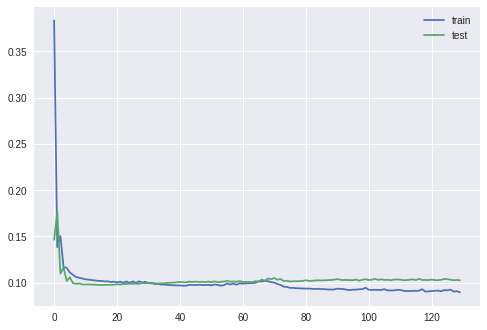

In [37]:
import matplotlib.pyplot as plt 
model = Sequential()
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(train_X, train_y, epochs=130, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# make a prediction
yhat = DataFrame(model.predict(test_X))
test_X = DataFrame(test_X.reshape((test_X.shape[0], test_X.shape[2])))
# invert scaling for forecast
inv_yhat = concat((yhat, test_X.iloc[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = DataFrame(test_y.reshape((len(test_y), 1)))
inv_y = concat((test_y, test_X.iloc[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print('r-squared: %f'%(r2_score(inv_y, inv_yhat)))

Test RMSE: 0.543
r-squared: -0.089099


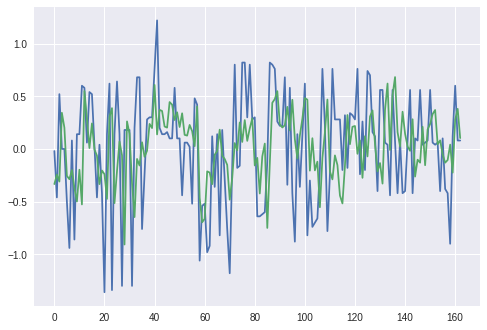

In [34]:
plt.plot(inv_y)
plt.plot(inv_yhat)